In [1]:
import os
import pandas as pd
import seaborn

In [2]:
_all = {}
for i in os.listdir("./data_save"):
    rounds, step, reward, select = i.replace("--", "-$").replace(".jpg", "").split("-")
    rounds = int(rounds)
    step = int(step)
    reward = float(reward.replace("$", "-"))
    select = [float(j) for j in select.split("_")]
    if _all.get(rounds, None) is not None:
        _all.get(rounds).append([step, reward, select])
    else:
        _all[rounds] = [[step, reward, select]]

In [3]:
avg_return = []
for each in _all.keys():
    avg_return.append([len(_all[each]), pd.DataFrame(_all[each], columns =["step", "reward", "output"]).sort_values("step").reward.sum() / len(_all[each])])

In [4]:
avg_return = pd.DataFrame(avg_return, columns=["step", "avg_return"]).sort_values("step")

<AxesSubplot:xlabel='step', ylabel='avg_return'>

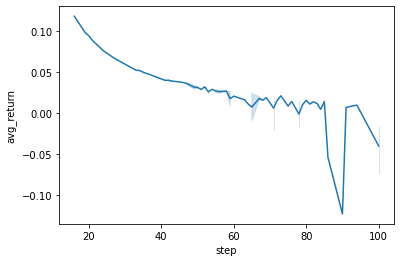

In [5]:
seaborn.lineplot(y=avg_return["avg_return"], x=avg_return["step"])

In [6]:
avg_return = []
for each in _all.keys():
    _ = pd.DataFrame(_all[each], columns =["step", "reward", "output"]).sort_values("step").reset_index(drop=True)
    avg_return.append([len(_all[each]), (_.reward.sum() - _.loc[len(_) -1, "reward"] )/ (len(_all[each]) -1)])

In [7]:
avg_return = pd.DataFrame(avg_return, columns=["step", "avg_return"]).sort_values("step")

<AxesSubplot:xlabel='step', ylabel='avg_return'>

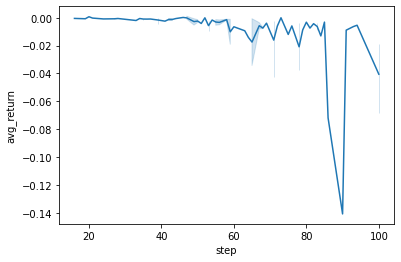

In [8]:
seaborn.lineplot(y=avg_return["avg_return"], x=avg_return["step"])

In [9]:
avg_return = []
for each in _all.keys():
    if len(_all[each]) < 100:
        avg_return.append([len(_all[each]), pd.DataFrame(_all[each], columns =["step", "reward", "output"]).sort_values("step").reward.sum() / len(_all[each])])

<AxesSubplot:xlabel='step', ylabel='avg_return'>

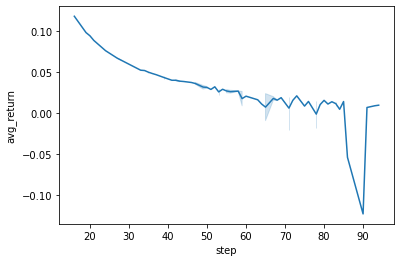

In [10]:
avg_return = pd.DataFrame(avg_return, columns=["step", "avg_return"]).sort_values("step")
seaborn.lineplot(y=avg_return["avg_return"], x=avg_return["step"])